**date**: Tarih

**Usage_kWh**: Kullanım (kWh cinsinden)

**Lagging_Current_Reactive.Power_kVarh**: Geri kalmış Akım Reaktif Güç (kVarh cinsinden)

**Leading_Current_Reactive_Power_kVarh**: Öncü Akım Reaktif Güç (kVarh cinsinden)

**CO2(tCO2)**: CO2 Emisyonu (ton cinsinden)

**Lagging_Current_Power_Factor**: Geri kalmış Akım Güç Faktörü

**Leading_Current_Power_Factor**: Öncü Akım Güç Faktörü

**NSM**: Normal Standart Metre (Birim açıklanmamış, muhtemelen ölçüm birimi)

**WeekStatus**: Haftanın Durumu (Tatil, Tatil Değil)

**Day_of_week**: Haftanın Günü

**Load_Type**: Yük Türüü

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline

plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")


In [2]:
df= pd.read_csv("D:\Datasets\Steel_industry_data.csv")
df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00       0.00   
1                                      0.00       0.00   
2                                      0.00       0.00   
3                                      0.00       0.00   
4                                      0.00       0.00   
...                                     ...        ...   
35035                                  0.00       0.00   
35036                                  0.00       0.00   
35037                                  0.07       0.00   
35038                                  0.11       0.00   
35039                                  0.07       0.00   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [4]:
df.describe().T

count     mean      std  min      25%  \
Usage_kWh                            35040.00    27.39    33.44 0.00     3.20   
Lagging_Current_Reactive.Power_kVarh 35040.00    13.04    16.31 0.00     2.30   
Leading_Current_Reactive_Power_kVarh 35040.00     3.87     7.42 0.00     0.00   
CO2(tCO2)                            35040.00     0.01     0.02 0.00     0.00   
Lagging_Current_Power_Factor         35040.00    80.58    18.92 0.00    63.32   
Leading_Current_Power_Factor         35040.00    84.37    30.46 0.00    99.70   
NSM                                  35040.00 42750.00 24940.53 0.00 21375.00   

                                          50%      75%      max  
Usage_kWh                                4.57    51.24   157.18  
Lagging_Current_Reactive.Power_kVarh     5.00    22.64    96.91  
Leading_Current_Reactive_Power_kVarh     0.00     2.09    27.76  
CO2(tCO2)                                0.00     0.02     0.07  
Lagging_Current_Power_Factor            87.96    99.02   100.00  
Leading_Current_Power_Factor           100.00   100.00   100.00  
NSM                                  42750.00 64125.00 85500.00

In [5]:
for col in df.select_dtypes(include = "object"):
    if col == "date":
        continue
    else:
        print(col)
        print("***")
        print(df[col].value_counts())
        print("***********")
        

WeekStatus
***
WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64
***********
Day_of_week
***
Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64
***********
Load_Type
***
Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64
***********


<Axes: >

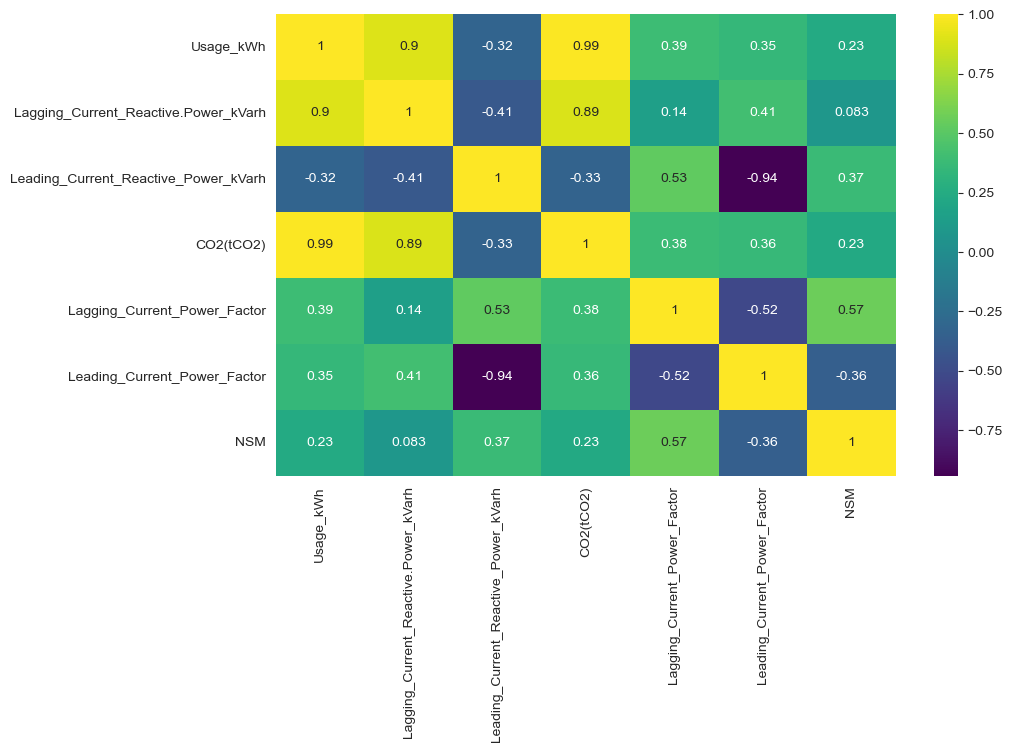

In [6]:
sns.heatmap(df.select_dtypes("number").corr(), annot=True, cmap="viridis")

 # Elektrik tüketimi için ortalama, min ve max değerlerine baktık

In [3]:
average_usage = df['Usage_kWh'].mean()
min_usage = df['Usage_kWh'].min()
max_usage = df['Usage_kWh'].max()

print("Elektrik Tüketimi:")
print(f"Ortalama: {average_usage:.2f} kWh")
print(f"Minimum: {min_usage:.2f} kWh")
print(f"Maksimum: {max_usage:.2f} kWh")
print()

Elektrik Tüketimi:
Ortalama: 27.39 kWh
Minimum: 0.00 kWh
Maksimum: 157.18 kWh



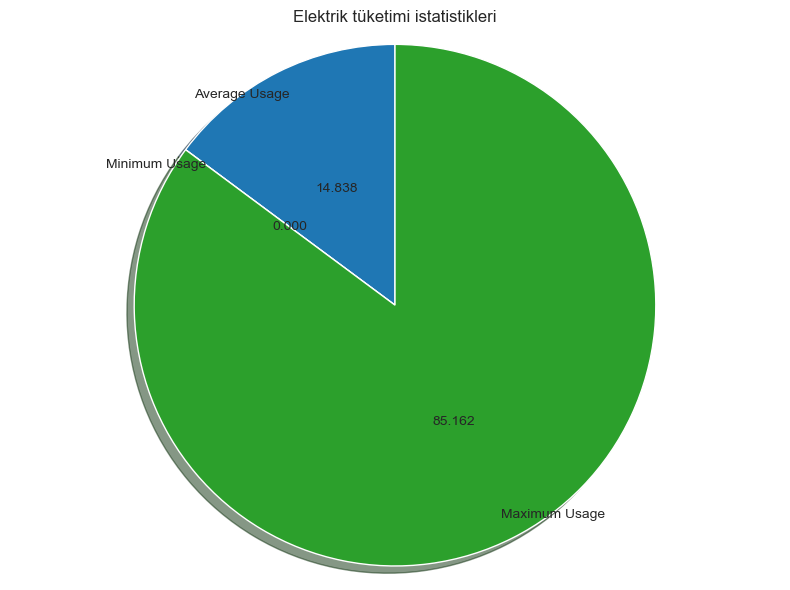

In [64]:
plt.figure(figsize=(8,6))


data = [average_usage, min_usage, max_usage]
labels = ['Average Usage', 'Minimum Usage', 'Maximum Usage']

plt.pie(data, labels=labels,
        labeldistance=0.9, 
        autopct="%.3f", 
        startangle=90, 
        shadow=True,  
        pctdistance=0.5,
       )

plt.axis('equal')
plt.title("Elektrik tüketimi istatistikleri")

plt.tight_layout()

plt.show()


# Reaktif güçler ile enerji tüketimi arasındaki ilişki incelendi. Lagging Reactive Power ile enerji tüketimi arasında yüksek bir korelasyon vardır. Ama leading reactive powerın enerji tüketimine etkisi ters orantılı olup çok değildir


In [ ]:
import matplotlib.pyplot as plt

# "Lagging Current" ve "Leading Current" oranlarını hesapla
lagging_ratio = (df['Lagging_Current_Reactive.Power_kVarh'] / df['Usage_kWh']) * 100
leading_ratio = (df['Leading_Current_Reactive_Power_kVarh'] / df['Usage_kWh']) * 100

# Oranları bir veri çerçevesine kaydet
ratios_df = pd.DataFrame({'Lagging Current Ratio (%)': lagging_ratio, 'Leading Current Ratio (%)': leading_ratio})

# Oranları sütun grafikleriyle görselleştir
ratios_df.plot(kind='bar', figsize=(10, 6))
plt.title('Lagging and Leading Current Ratios compared to Total Energy Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


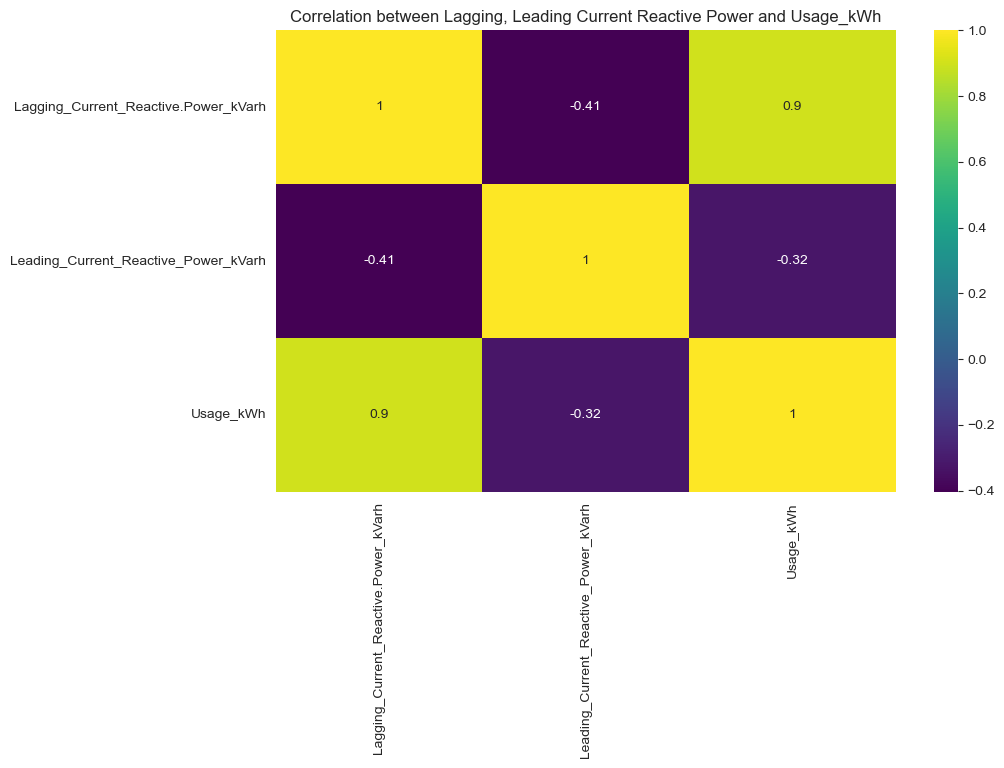

In [31]:
sns.heatmap(df[["Lagging_Current_Reactive.Power_kVarh", "Leading_Current_Reactive_Power_kVarh", "Usage_kWh"]].corr(), annot=True, cmap="viridis")
plt.title('Correlation between Lagging, Leading Current Reactive Power and Usage_kWh')
plt.show()


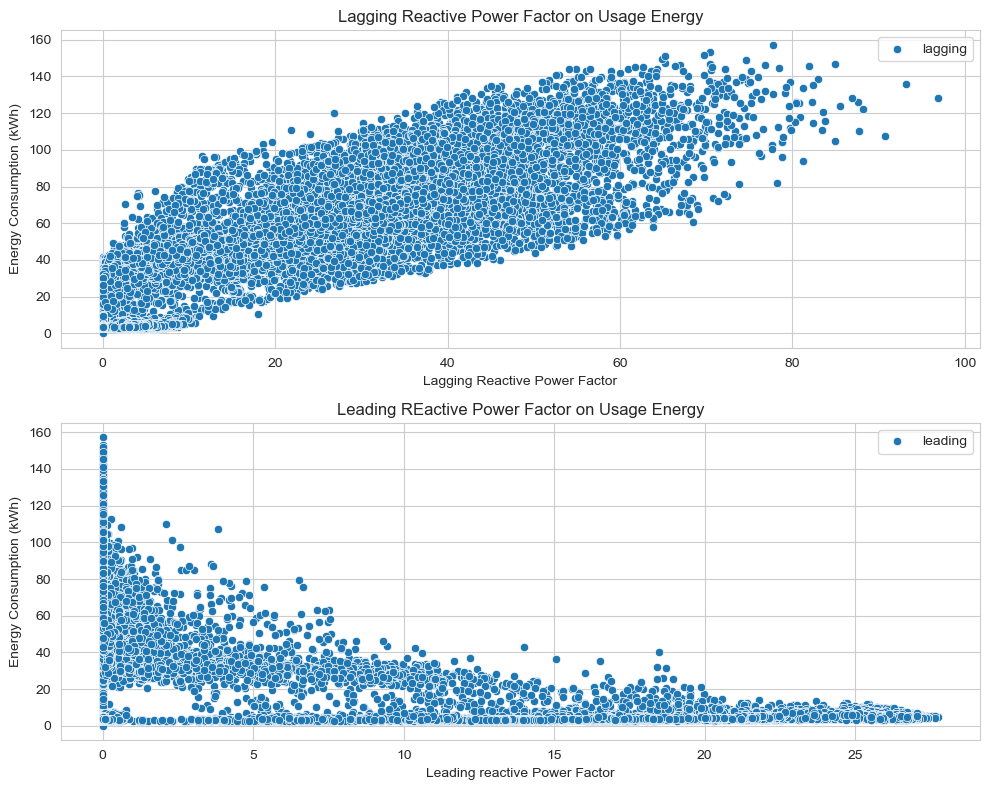

In [28]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1) 
sns.scatterplot(data=df, x='Lagging_Current_Reactive.Power_kVarh', y='Usage_kWh', label="lagging")
plt.title('Lagging Reactive Power Factor on Usage Energy')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Lagging Reactive Power Factor')

plt.legend()

plt.subplot(2, 1, 2) 
sns.scatterplot(data=df, x='Leading_Current_Reactive_Power_kVarh', y='Usage_kWh', label="leading")
plt.title('Leading REactive Power Factor on Usage Energy')

plt.xlabel('Leading reactive Power Factor')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()

plt.tight_layout() 
plt.show()


# Gerçek güçlerle enerji kullanımı arasında korelasyona baktık ve sonrasında dağılım grafiğinde inceledik

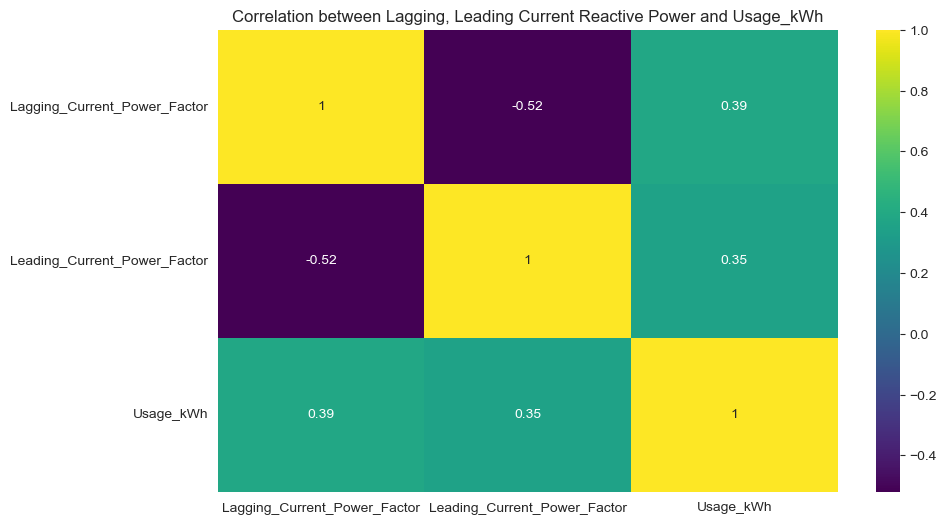

In [32]:
sns.heatmap(df[["Lagging_Current_Power_Factor", "Leading_Current_Power_Factor", "Usage_kWh"]].corr(), annot=True, cmap="viridis")
plt.title('Correlation between Lagging, Leading Current Reactive Power and Usage_kWh')
plt.show()


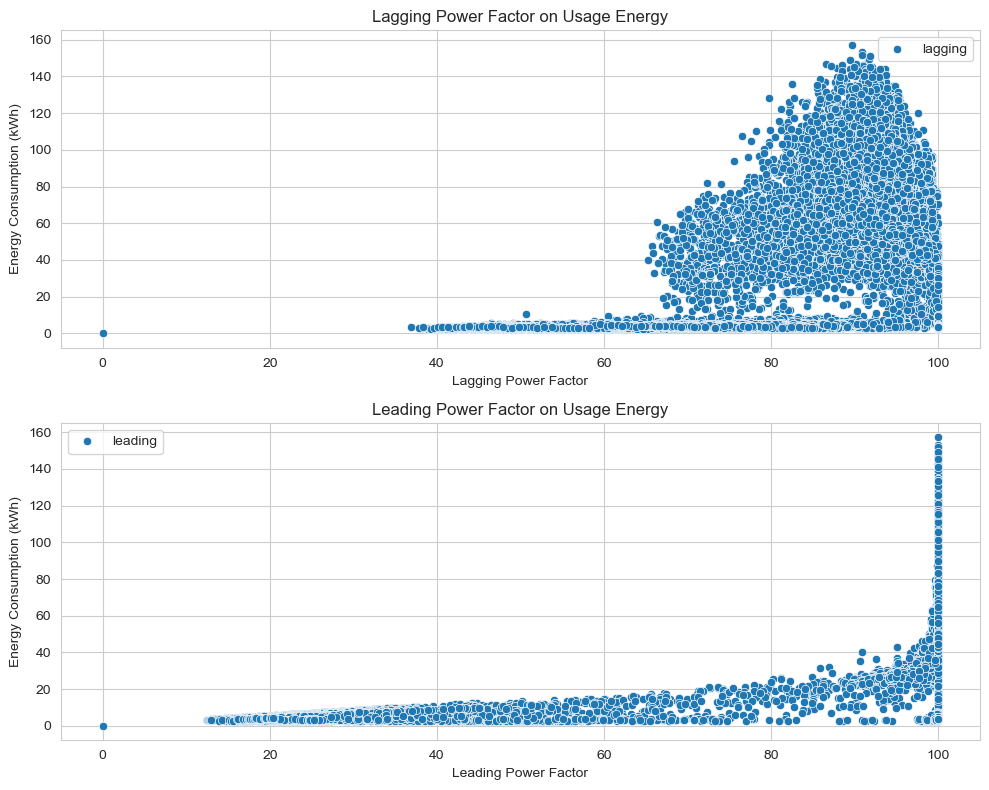

In [26]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1) 
sns.scatterplot(data=df, x='Lagging_Current_Power_Factor', y='Usage_kWh', label="lagging")
plt.title('Lagging Power Factor on Usage Energy')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Lagging Power Factor')

plt.legend()

plt.subplot(2, 1, 2) 
sns.scatterplot(data=df, x='Leading_Current_Power_Factor', y='Usage_kWh', label="leading")
plt.title('Leading Power Factor on Usage Energy')

plt.xlabel('Leading Power Factor')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()

plt.tight_layout() 
plt.show()


# outlier tespiti CO2 için

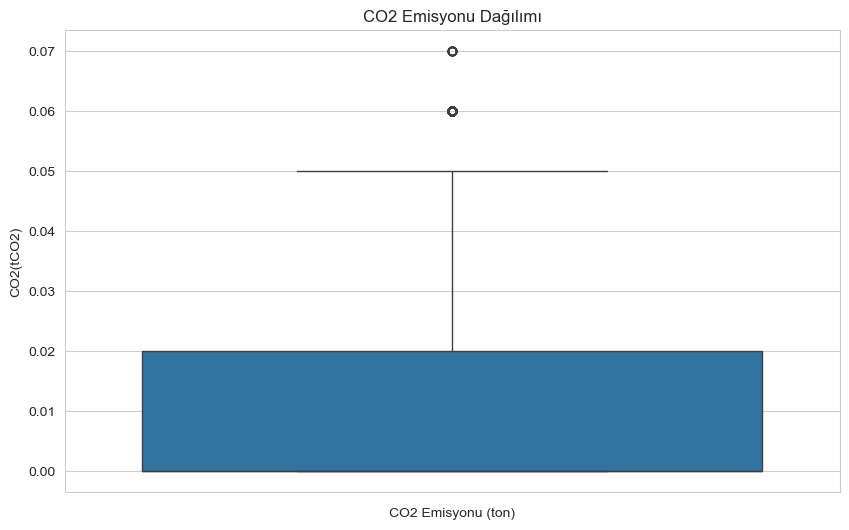

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['CO2(tCO2)'])
plt.title('CO2 Emisyonu Dağılımı')
plt.xlabel('CO2 Emisyonu (ton)')
plt.show()

### outlier olan CO2lere bakarız

In [51]:
filtered_df = df[(df["CO2(tCO2)"] == 0.07) | (df["CO2(tCO2)"] == 0.06)]
filtered_df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
228    03/01/2018 09:15     121.79                                 41.26   
260    03/01/2018 17:15     140.51                                 52.96   
262    03/01/2018 17:45     125.96                                 39.20   
321    04/01/2018 08:30     136.19                                 74.88   
323    04/01/2018 09:00     131.18                                 53.60   
...                 ...        ...                                   ...   
33851  19/12/2018 15:00     145.22                                 70.67   
33853  19/12/2018 15:30     130.46                                 60.23   
33855  19/12/2018 16:00     125.21                                 58.43   
33856  19/12/2018 16:15     133.56                                 64.40   
33859  19/12/2018 17:00     125.50                                 50.69   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
228                                    0.00       0.06   
260                                    0.00       0.06   
262                                    0.00       0.06   
321                                    0.00       0.06   
323                                    0.00       0.06   
...                                     ...        ...   
33851                                  0.00       0.07   
33853                                  0.00       0.06   
33855                                  0.00       0.06   
33856                                  0.00       0.06   
33859                                  0.00       0.06   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
228                           94.71                        100.00  33300   
260                           93.57                        100.00  62100   
262                           95.48                        100.00  63900   
321                           87.63                        100.00  30600   
323                           92.57                        100.00  32400   
...                             ...                           ...    ...   
33851                         89.92                        100.00  54000   
33853                         90.79                        100.00  55800   
33855                         90.62                        100.00  57600   
33856                         90.08                        100.00  58500   
33859                         92.72                        100.00  61200   

      WeekStatus Day_of_week     Load_Type  
228      Weekday   Wednesday   Medium_Load  
260      Weekday   Wednesday  Maximum_Load  
262      Weekday   Wednesday  Maximum_Load  
321      Weekday    Thursday    Light_Load  
323      Weekday    Thursday    Light_Load  
...          ...         ...           ...  
33851    Weekday   Wednesday   Medium_Load  
33853    Weekday   Wednesday   Medium_Load  
33855    Weekday   Wednesday   Medium_Load  
33856    Weekday   Wednesday   Medium_Load  
33859    Weekday   Wednesday   Medium_Load  

[437 rows x 11 columns]

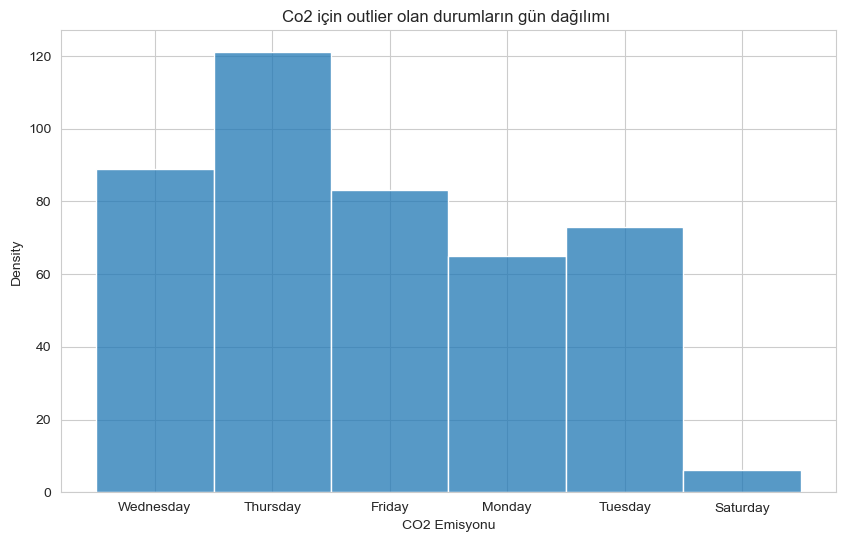

In [54]:
sns.histplot(x=filtered_df['Day_of_week'])
plt.title('Co2 için outlier olan durumların gün dağılımı ')
plt.xlabel('CO2 Emisyonu')
plt.ylabel('Density')
plt.show()


# Gece yarısından itibaren geçen saniye sayısı (NSM) ile elektrik tüketimivarasındaki ilişki.


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')


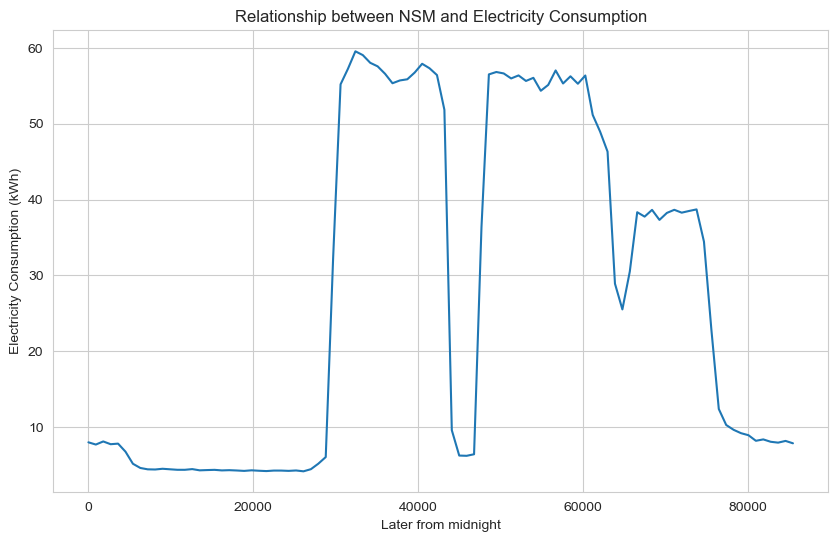

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='NSM', y='Usage_kWh',ci=None)
plt.title('Relationship between NSM and Electricity Consumption')
plt.xlabel('Later from midnight')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()


# Gece yarısından itibaren geçen saniye sayısı (NSM) ile elektrik tüketimivarasındaki ilişkinin günlere göre dağılımı.

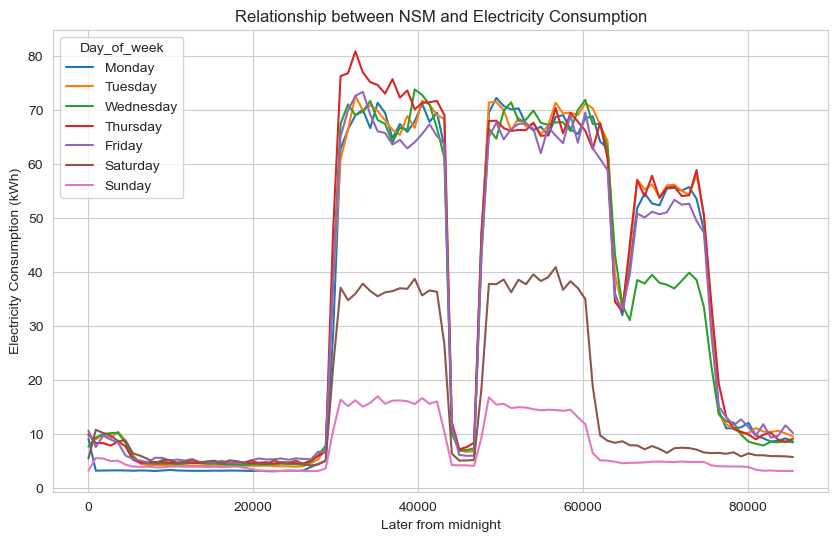

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='NSM', y='Usage_kWh', hue="Day_of_week", ci=None)
plt.title('Relationship between NSM and Electricity Consumption')
plt.xlabel('Later from midnight')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()


In [19]:
midnight = df[(df['date'].dt.hour >= 0) & (df['date'].dt.hour < 6)]
morning = df[(df['date'].dt.hour >= 6) & (df['date'].dt.hour < 24)]

# gece yarısında enerji tüketimini gözlemledik gün bazında ve burda pazartesileri gece yarısında enerji kullanımını ciddi anlamda düştüğünü gördük

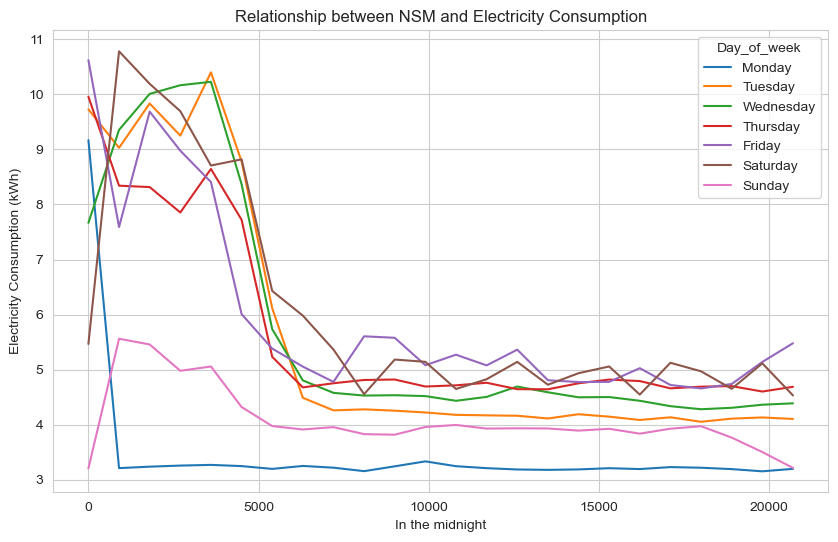

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=midnight, x='NSM', y='Usage_kWh', hue="Day_of_week", ci=None)
plt.title('Relationship between NSM and Electricity Consumption')
plt.xlabel('In the midnight')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()


# sabah 6dan gece 12ye kadar olan gözlemimizdede pazar günleri fazla enerji harcanmadığını gösterdi 

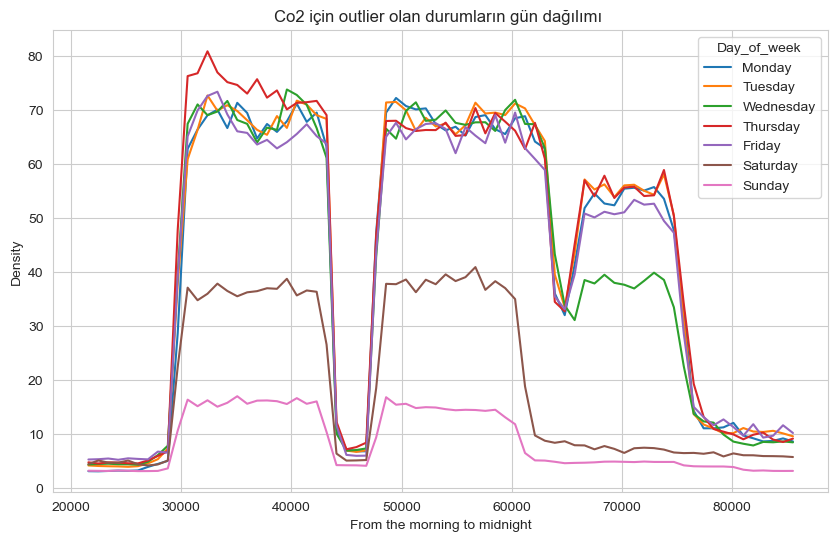

In [22]:
sns.lineplot(data=morning, x='NSM', y='Usage_kWh', ci=None,hue="Day_of_week")
plt.title('Co2 için outlier olan durumların gün dağılımı ')
plt.xlabel('From the morning to midnight')
plt.ylabel('Density')
plt.show()


# Elektrik tüketiminin yıl boyunca nasıl değiştiğini belirleyin ve mevsimsel eğilimleri araştırın

In [5]:
winter_data = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-03-20')]
spring_data = df[(df['date'] >= '2018-03-21') & (df['date'] <= '2018-06-20')]
summer_data = df[(df['date'] >= '2018-06-21') & (df['date'] <= '2018-09-22')]
autumn_data = df[(df['date'] >= '2018-09-23') & (df['date'] <= '2018-12-31')]

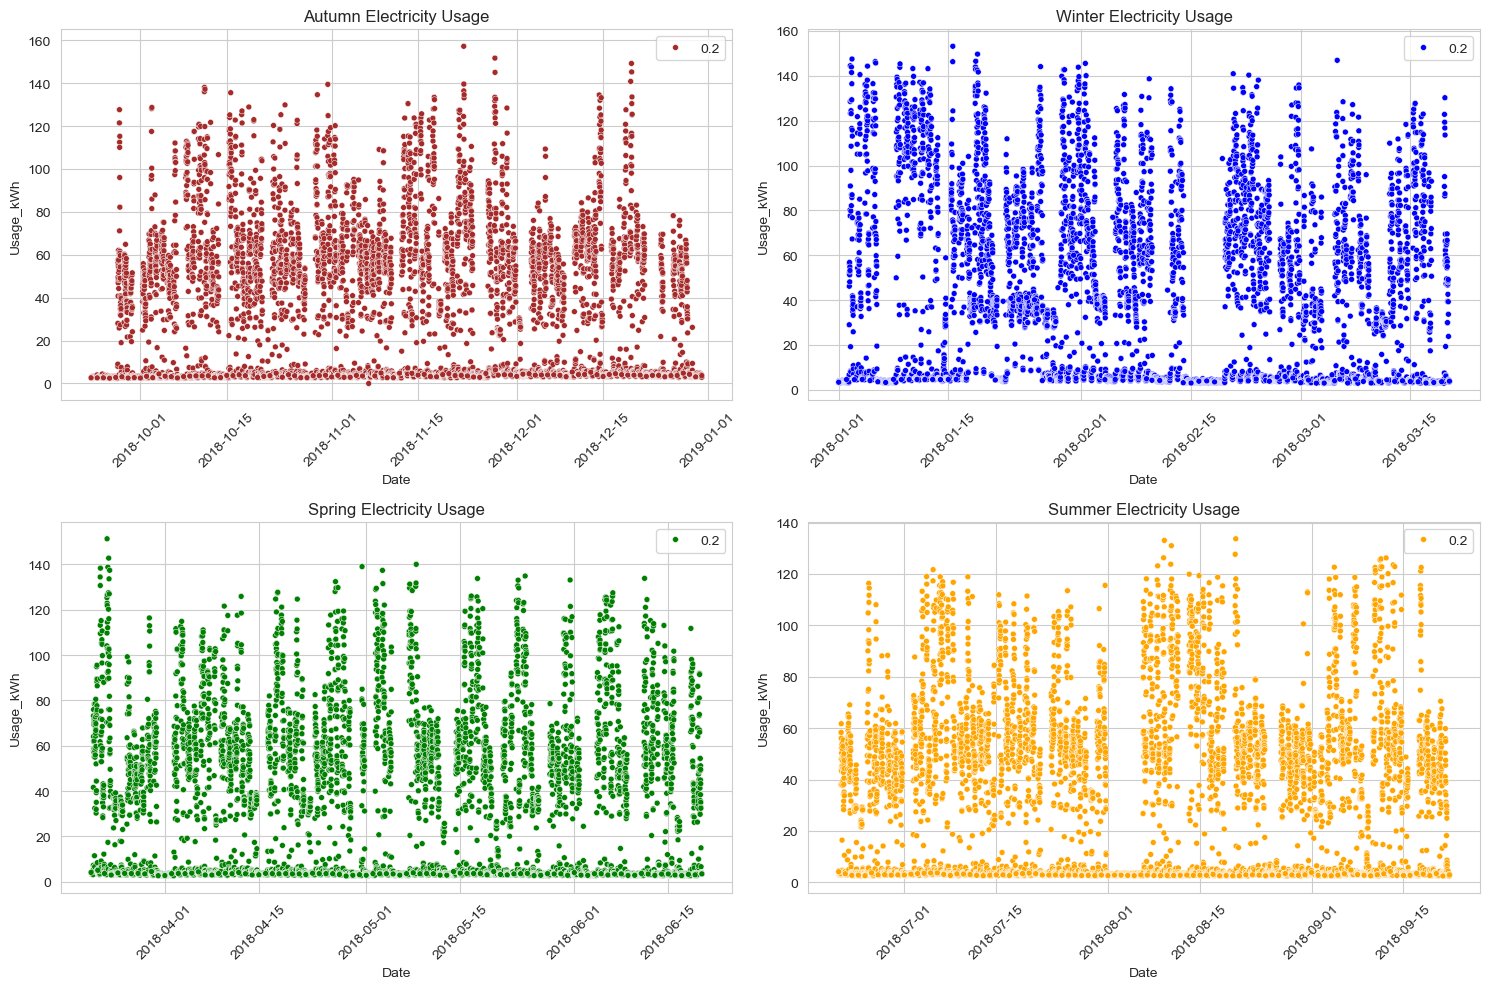

In [27]:
# Her bir mevsim için ayrı bir grafik oluşturun
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=autumn_data, x='date', y='Usage_kWh', color='brown',size=0.2)
plt.title('Autumn Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(data=winter_data, x='date', y='Usage_kWh', color='blue',size=0.2)
plt.title('Winter Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(data=spring_data, x='date', y='Usage_kWh', color='green',size=0.2)
plt.title('Spring Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(data=summer_data, x='date', y='Usage_kWh', color='orange',size=0.2)
plt.title('Summer Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)



plt.tight_layout()
plt.show()


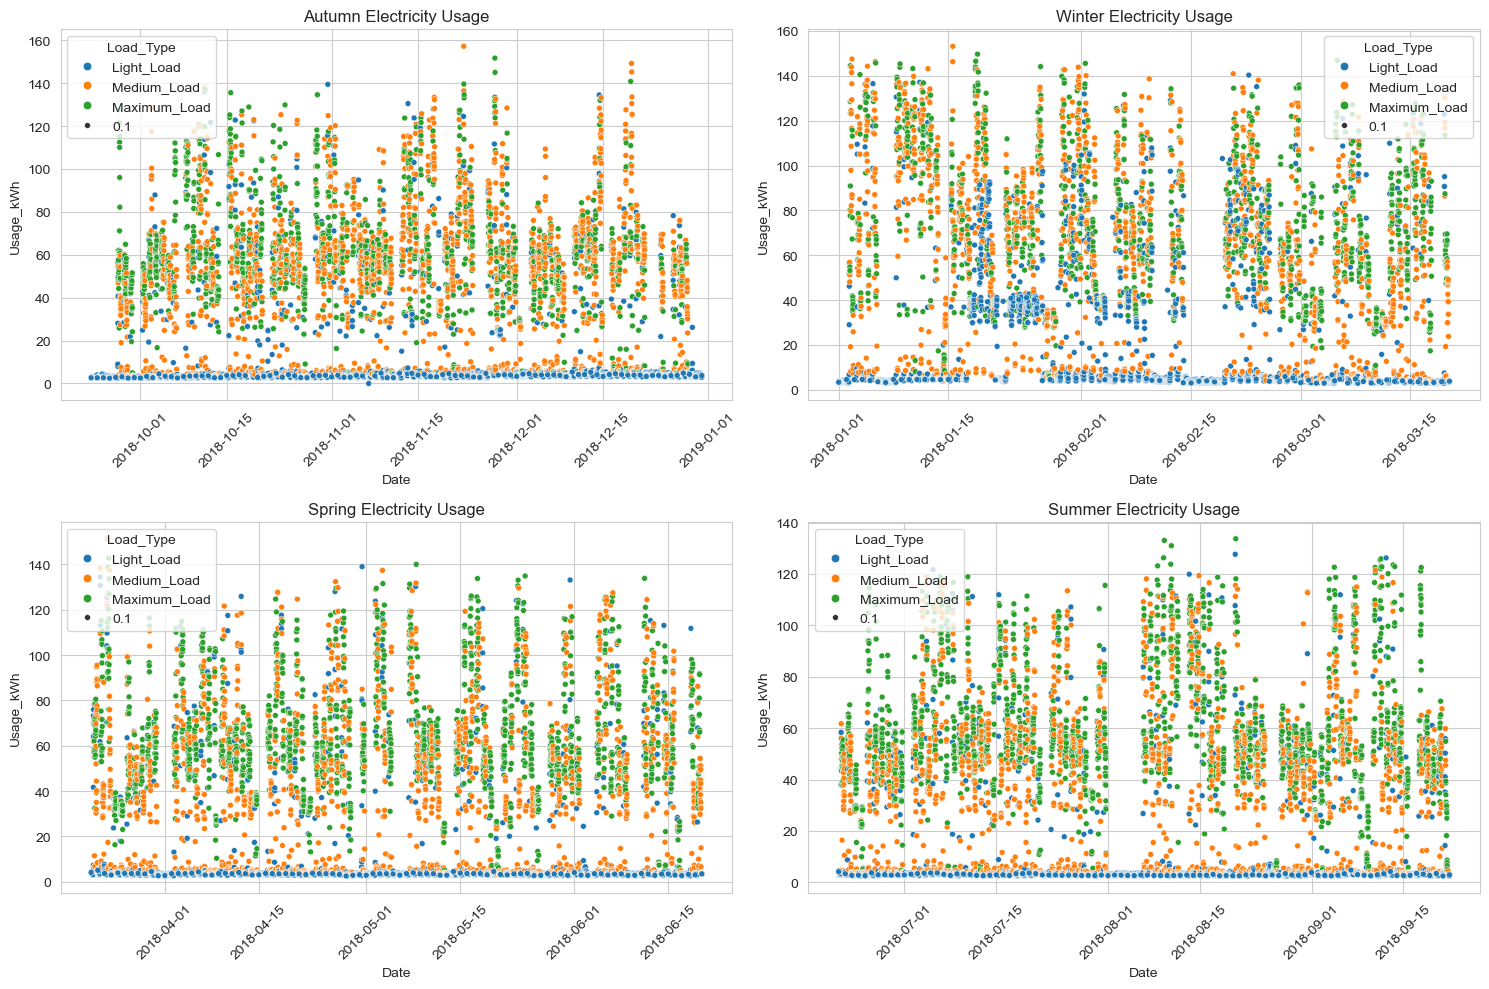

In [105]:
# Her bir mevsim için ayrı bir grafik oluşturun
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=autumn_data, x='date', y='Usage_kWh', hue="Load_Type", size=0.1)
plt.title('Autumn Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(data=winter_data, x='date', y='Usage_kWh', hue="Load_Type", size=0.1)
plt.title('Winter Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(data=spring_data, x='date', y='Usage_kWh', hue="Load_Type", size=0.1)
plt.title('Spring Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(data=summer_data, x='date', y='Usage_kWh',  hue="Load_Type", size=0.1)
plt.title('Summer Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


# mevsimlere göre elektrik kullanımında yük tipinin oranları

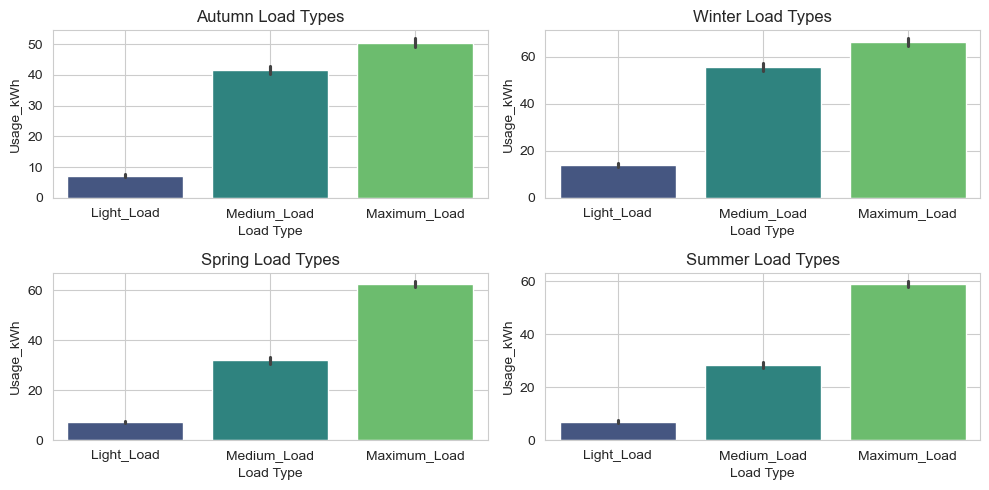

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

sns.barplot(x=autumn_data["Load_Type"], y=autumn_data["Usage_kWh"], palette='viridis', ax=ax[0][0])
ax[0][0].set_title('Autumn Load Types')
ax[0][0].set_xlabel('Load Type')
ax[0][0].set_ylabel('Usage_kWh')
ax[0][0].grid(True)

sns.barplot(x=winter_data["Load_Type"], y=winter_data["Usage_kWh"], palette='viridis', ax=ax[0][1])
ax[0][1].set_title('Winter Load Types')
ax[0][1].set_xlabel('Load Type')
ax[0][1].set_ylabel('Usage_kWh')
ax[0][1].grid(True)

sns.barplot(x=spring_data["Load_Type"], y=spring_data["Usage_kWh"], palette='viridis', ax=ax[1][0])
ax[1][0].set_title('Spring Load Types')
ax[1][0].set_xlabel('Load Type')
ax[1][0].set_ylabel('Usage_kWh')
ax[1][0].grid(True)

sns.barplot(x=summer_data["Load_Type"], y=summer_data["Usage_kWh"], palette='viridis', ax=ax[1][1])
ax[1][1].set_title('Summer Load Types')
ax[1][1].set_xlabel('Load Type')
ax[1][1].set_ylabel('Usage_kWh')
ax[1][1].grid(True)

plt.tight_layout()
plt.show()



# enerji tüketimin mevsimlerde hafta içi ve hafta sonu olarak dağılımı

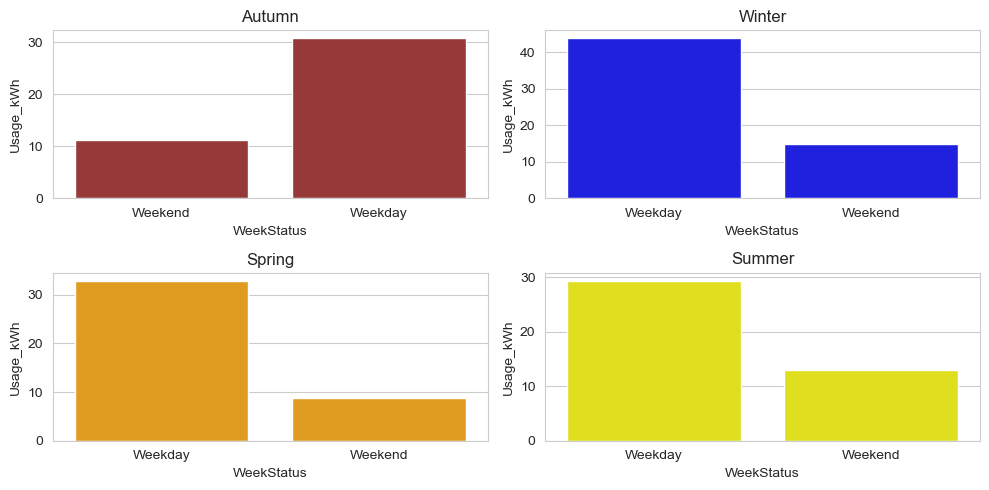

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

sns.barplot(data=autumn_data, x="WeekStatus", y="Usage_kWh",color='brown', ci=None, hue_order=["Weekday", "Weekend"], ax=ax[0][0])
ax[0][0].set_title('Autumn')

sns.barplot(data=winter_data, x="WeekStatus", y="Usage_kWh",color='blue', ci=None, ax=ax[0][1])
ax[0][1].set_title('Winter')

sns.barplot(data=spring_data, x="WeekStatus", y="Usage_kWh",color='orange', ci=None, ax=ax[1][0])
ax[1][0].set_title('Spring')

sns.barplot(data=summer_data, x="WeekStatus", y="Usage_kWh", ci=None,color='yellow', ax=ax[1][1])
ax[1][1].set_title('Summer')


plt.tight_layout()
plt.show()


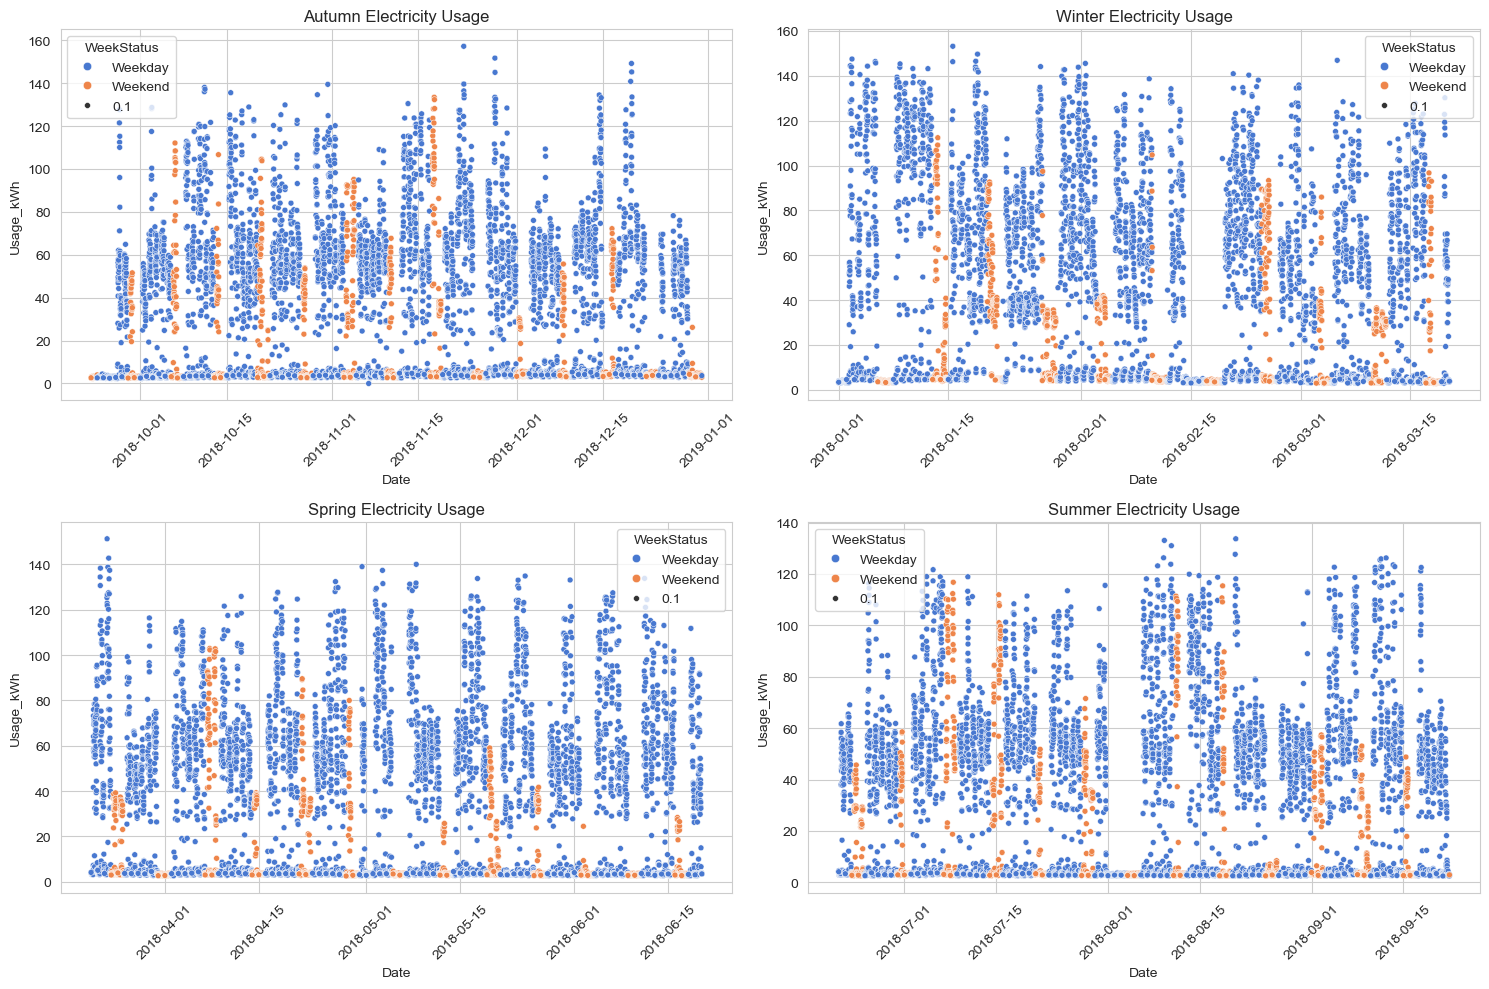

In [116]:
# Her bir mevsim için ayrı bir grafik oluşturun
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=autumn_data, x='date', y='Usage_kWh', hue="WeekStatus", size=0.1,  palette='muted',hue_order=["Weekday", "Weekend"])
plt.title('Autumn Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(data=winter_data, x='date', y='Usage_kWh', hue="WeekStatus", size=0.1, palette='muted')
plt.title('Winter Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(data=spring_data, x='date', y='Usage_kWh', hue="WeekStatus", size=0.1, palette='muted')
plt.title('Spring Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(data=summer_data, x='date', y='Usage_kWh',  hue="WeekStatus", size=0.1, palette='muted')
plt.title('Summer Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


# Enerji tüketimin hafta bazında yoğunluğu

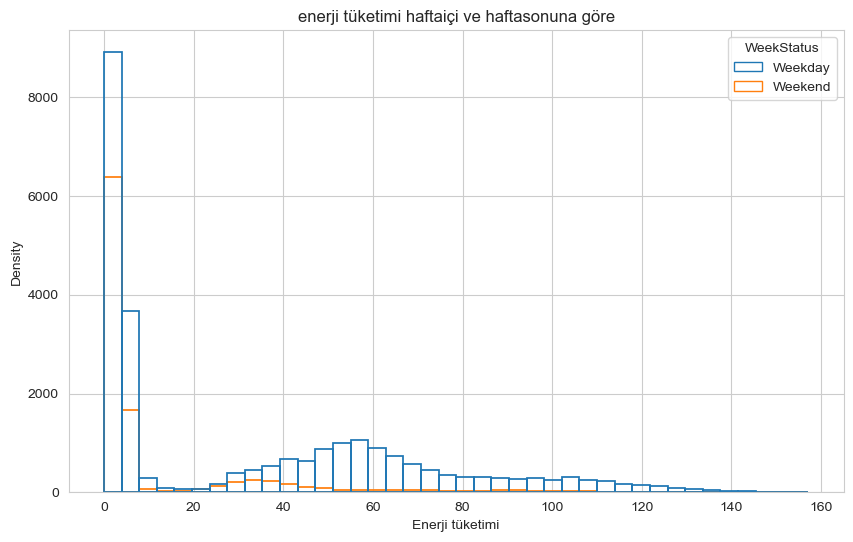

In [126]:
sns.histplot(data=df, x='Usage_kWh', hue='WeekStatus', bins=40,  fill=False)
plt.title('enerji tüketimi haftaiçi ve haftasonuna göre')
plt.xlabel('Enerji tüketimi')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# haftanın günlerine göre elektrik kullanımı

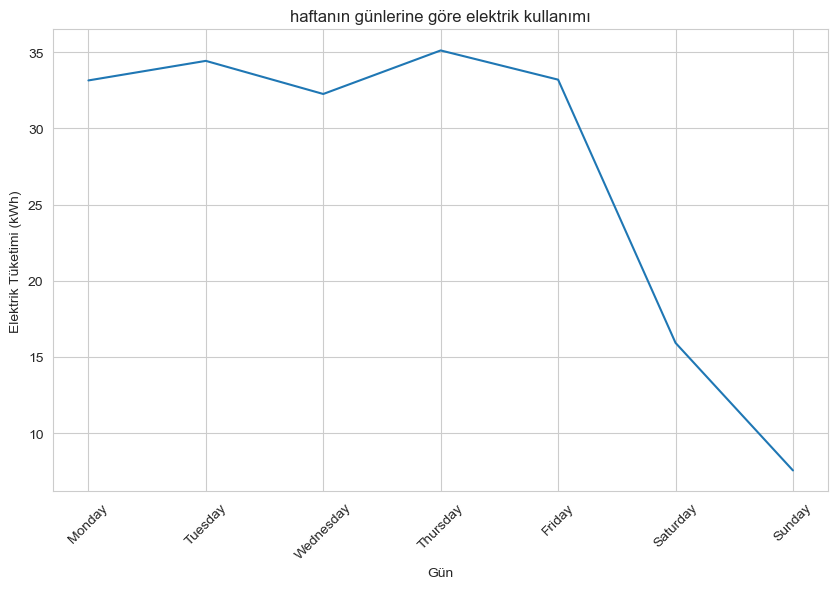

In [148]:
fig,ax= plt.subplots()
sns.lineplot(data=df, x='Day_of_week', y='Usage_kWh', ci=None)

plt.title('haftanın günlerine göre elektrik kullanımı')
plt.xlabel('Gün')
plt.ylabel('Elektrik Tüketimi (kWh)')
plt.xticks(rotation=45)
plt.show()

In [151]:
# haftanın günlerine göre elektrik kullanımının yük tipine göre dağılımı

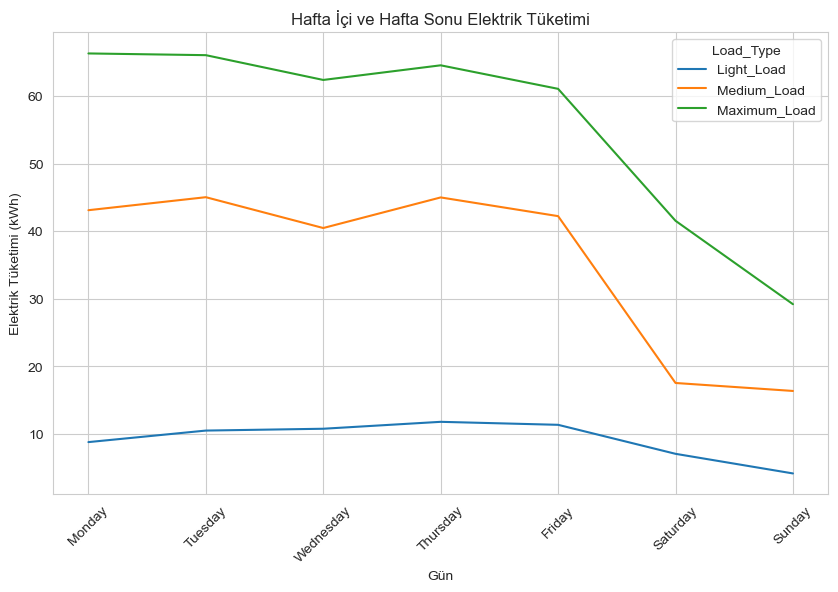

In [150]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Day_of_week', y='Usage_kWh',hue= "Load_Type", ci=None)
plt.title('Hafta İçi ve Hafta Sonu Elektrik Tüketimi')
plt.xlabel('Gün')
plt.ylabel('Elektrik Tüketimi (kWh)')
plt.xticks(rotation=45)
plt.show()

# Farklı yük tiplerinin (Hafif, Orta, Maksimum) elektrik tüketimini nasıl etkilediğini Gün bazında inceledik.


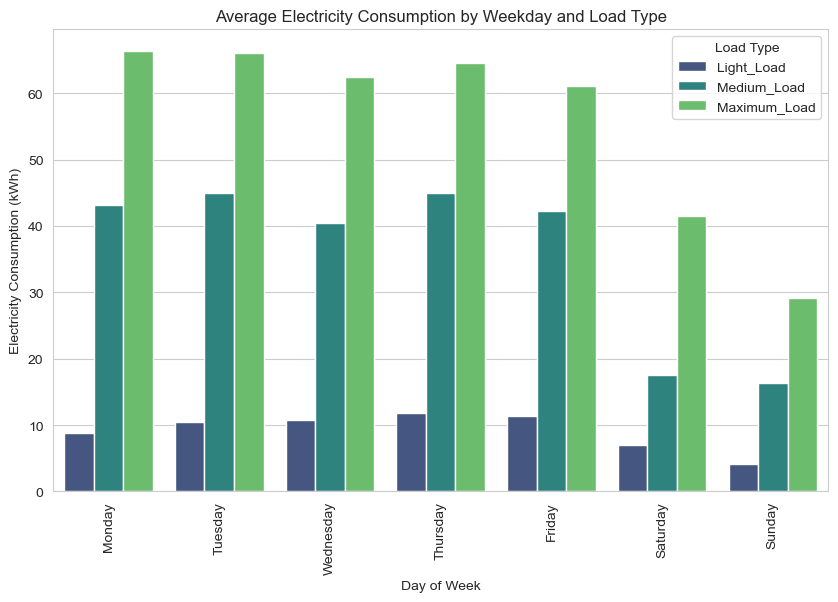

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Day_of_week', y='Usage_kWh', hue="Load_Type", palette='viridis', ci=None)
plt.title('Average Electricity Consumption by Weekday and Load Type')
plt.xlabel('Day of Week')
plt.ylabel('Electricity Consumption (kWh)')
plt.xticks(rotation=90)
plt.legend(title='Load Type')
plt.show()


## günlerin enerji kullanımı

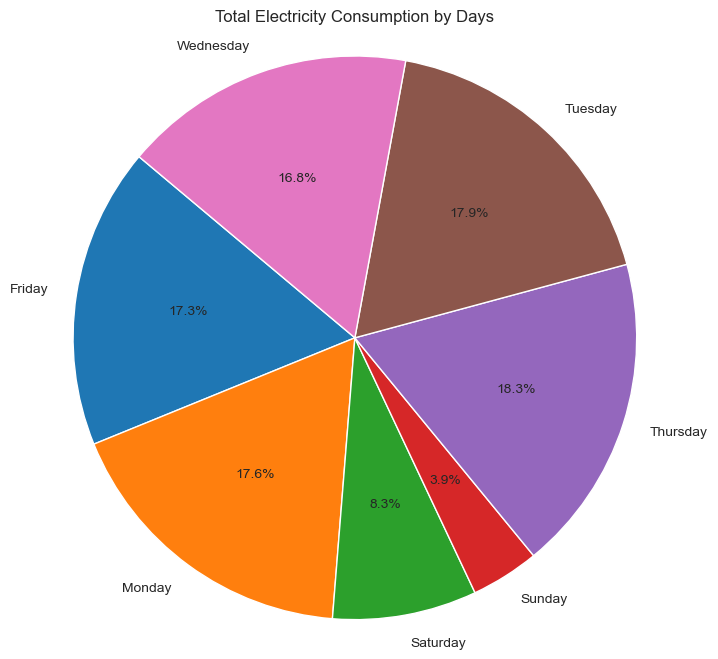

In [10]:
# Her bir yük tipinin toplam elektrik tüketimini hesaplayın
total_usage_per_load_type = df.groupby('Day_of_week')['Usage_kWh'].sum()

# Pasta grafiği oluşturun
plt.figure(figsize=(8, 8))
plt.pie(total_usage_per_load_type, labels=total_usage_per_load_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Electricity Consumption by Days')
plt.axis('equal')  # Daireyi daire olarak tutar
plt.show()


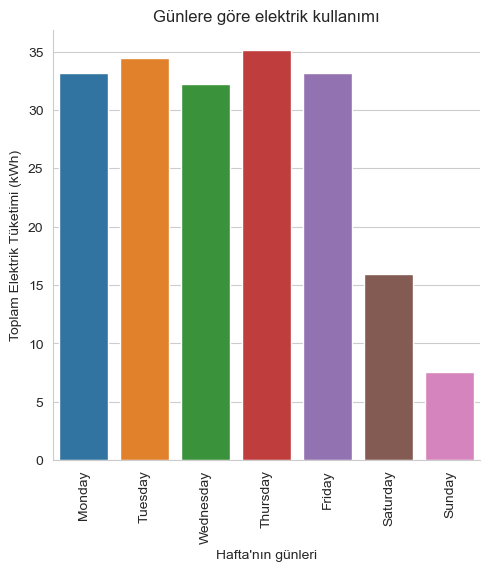

In [38]:
sns.catplot(kind="bar", data=df, x="Day_of_week", y="Usage_kWh", ci=None, hue="Day_of_week")
plt.title("Günlere göre elektrik kullanımı")
plt.xlabel("Hafta'nın günleri")
plt.ylabel("Toplam Elektrik Tüketimi (kWh)")
plt.xticks(rotation=90)
plt.show()


## enerji kullanımında yük tipleri

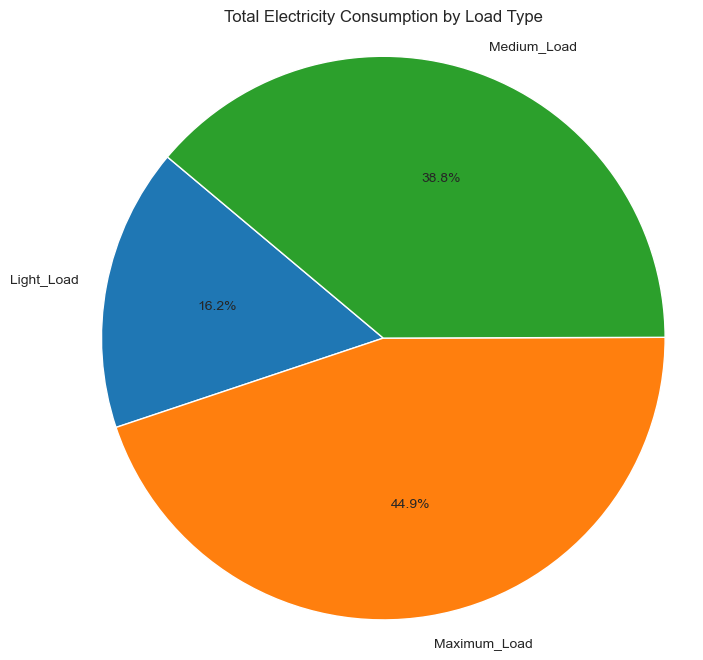

In [15]:
# Her bir yük tipinin toplam elektrik tüketimini hesaplayın
total_usage_per_load_type = df.groupby('Load_Type')['Usage_kWh'].sum()

# Pasta grafiği oluşturun
plt.figure(figsize=(8, 8))
plt.pie(total_usage_per_load_type, labels=total_usage_per_load_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Electricity Consumption by Load Type')
plt.axis('equal')  # Daireyi daire olarak tutar
plt.show()


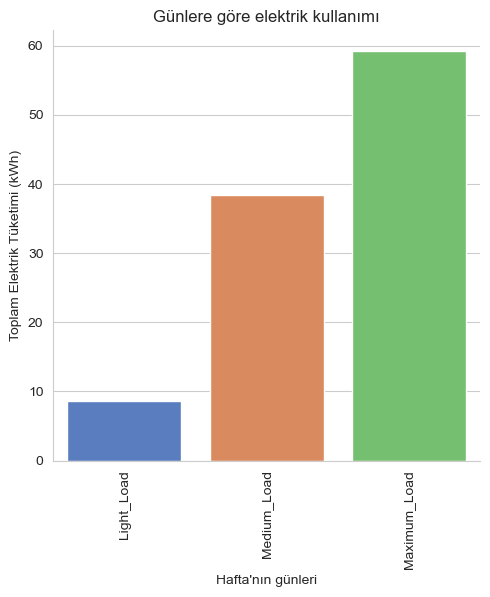

In [44]:
sns.catplot(kind="bar", data=df, x="Load_Type", y="Usage_kWh", ci=None, palette="muted")
plt.title("Günlere göre elektrik kullanımı")
plt.xlabel("Hafta'nın günleri")
plt.ylabel("Toplam Elektrik Tüketimi (kWh)")
plt.xticks(rotation=90)
plt.show()
